In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, average_precision_score, roc_auc_score)
from sklearn.base import is_classifier

In [2]:
df = pd.read_csv(r'C:\Users\NY_Data\Documents\fcdata\AIML Dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df['step'].value_counts()   

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
725        4
655        4
246        4
662        2
112        2
Name: count, Length: 743, dtype: int64

In [4]:
df.shape

(6362620, 11)

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Exploratory Data Analysis

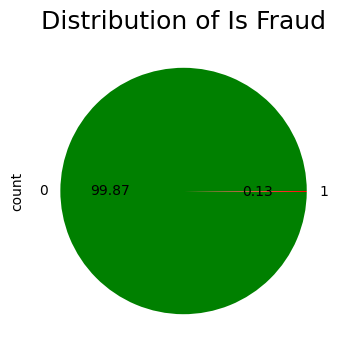

In [8]:
df['isFraud'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(8,4), colors=['green', 'red'])
plt.title('Distribution of Is Fraud', fontsize=18)
plt.show()

In [9]:
type_counts = df['type'].value_counts().sort_values(ascending=False)

In [10]:
type_counts

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

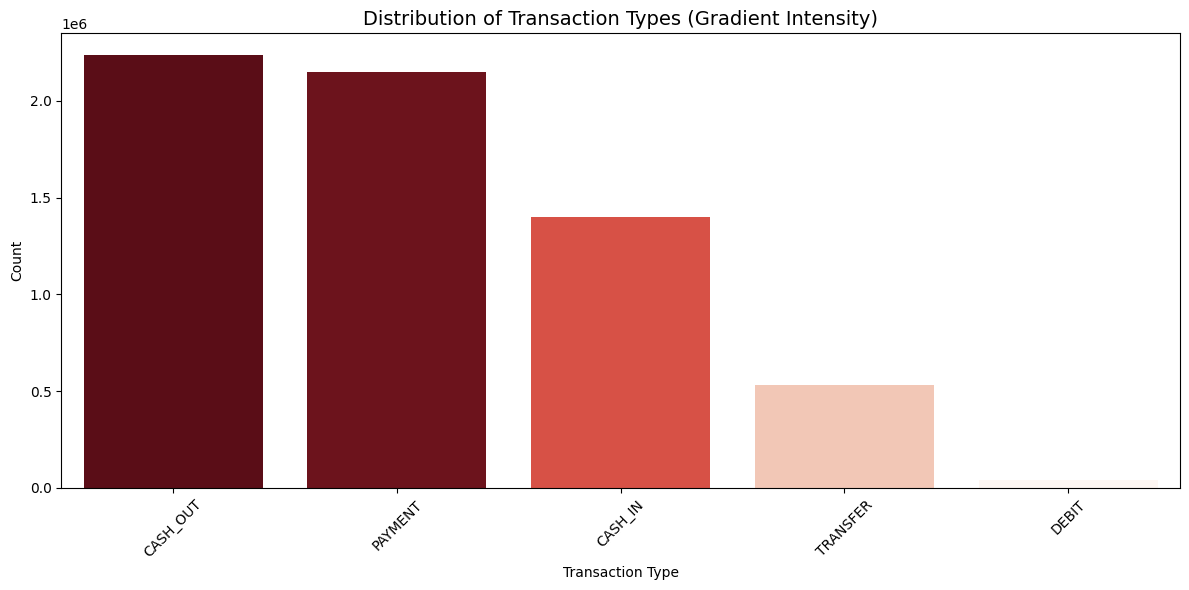

In [11]:

# gradient color map 
cmap = plt.cm.Reds

# Normalize counts for gradient (0-1 scale)
norm = plt.Normalize(type_counts.values.min(), type_counts.values.max())
colors = cmap(norm(type_counts.values))

plt.figure(figsize=(12, 6))

sns.barplot(
    x=type_counts.index,
    y=type_counts.values,
    palette=colors
)

plt.title("Distribution of Transaction Types (Gradient Intensity)", fontsize=14)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


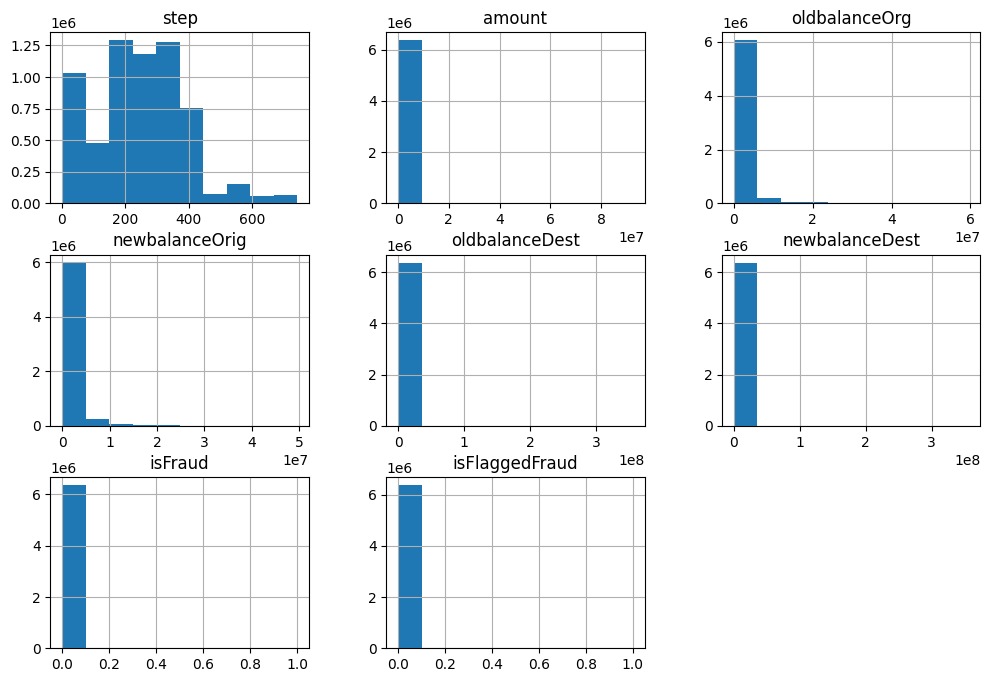

In [12]:
df.hist(figsize=(12,8))
plt.show()

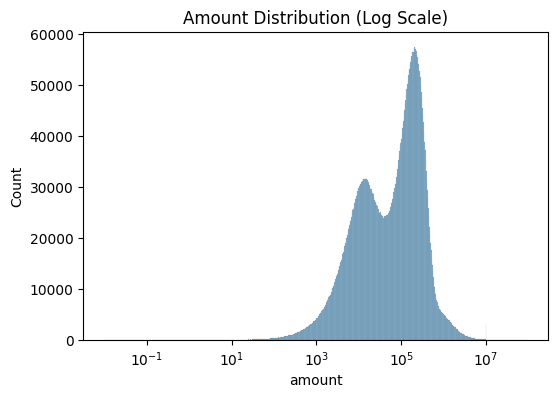

In [13]:
# Amount Distribution (Log Scale)
plt.figure(figsize=(6,4))
sns.histplot(df['amount'], kde=True, log_scale=True)
plt.title("Amount Distribution (Log Scale)")
plt.show()

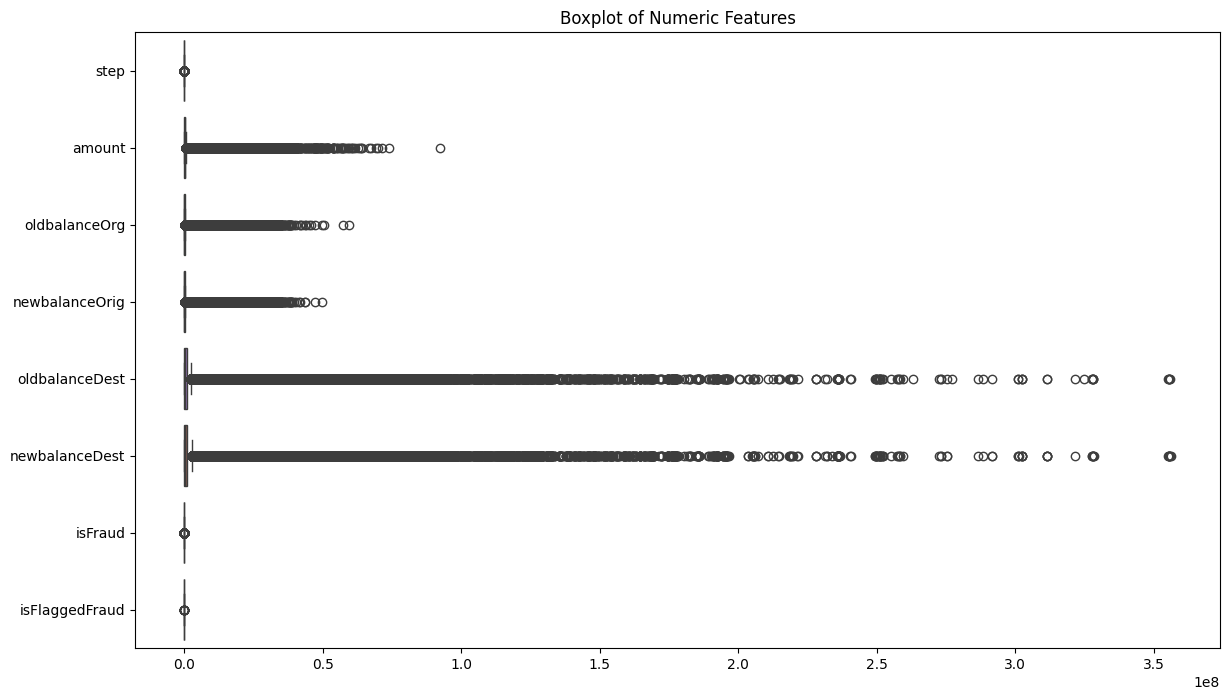

In [14]:
#outlier detection
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.select_dtypes(include=['float64','int64']), orient='h')
plt.title("Boxplot of Numeric Features")
plt.show()

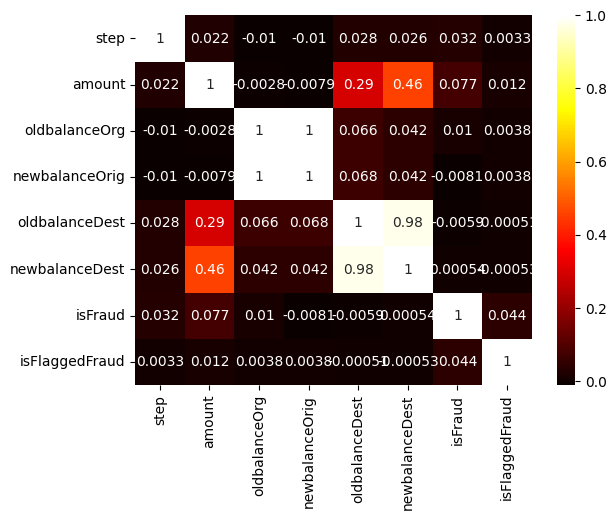

In [15]:
figsize=(9,6)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='hot')
plt.show()

In [16]:
df.drop(columns=['nameOrig', 'nameDest'], axis=1, inplace=True)

## Encoding Categorical Variables

In [17]:
le = LabelEncoder()
df['type']  = le.fit_transform(df['type'])

In [18]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5090096, 8)
(5090096,)
(1272524, 8)
(1272524,)


## Model Training

In [20]:
# Calculating imbalance ratio for XGBoost
ratio = (df.isFraud == 0).sum() / (df.isFraud == 1).sum()

In [21]:
models = {
    "Logistic Regression (Weighted)": LogisticRegression(class_weight='balanced', max_iter=500),

    "Decision Tree (Weighted)": DecisionTreeClassifier(class_weight='balanced'),

    "Random Forest (Weighted)": RandomForestClassifier(
        class_weight='balanced_subsample',
        n_estimators=300
    ),

    "Balanced Random Forest": BalancedRandomForestClassifier(
        n_estimators=300
    ),

    "Balanced Bagging Classifier": BalancedBaggingClassifier(
        n_estimators=30
    ),

    "Easy Ensemble Classifier": EasyEnsembleClassifier(
        n_estimators=20
    ),

    "Isolation Forest (Anomaly Detection)": IsolationForest(
        contamination=0.0013  # same as fraud %
    )
}


In [22]:
# choosing precision as FP are less expensive than FN
metric_choice = 'Recall'

results = []

anomaly_models = {'Isolation Forest (Anomaly Detection)', 'One-Class SVM'}


In [23]:
import os
import numpy as np

# Use all CPU cores for numpy, BLAS, MKL, sklearn
os.environ["OMP_NUM_THREADS"] = "1000"
os.environ["OPENBLAS_NUM_THREADS"] = "1000"
os.environ["MKL_NUM_THREADS"] = "1000"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1000"
os.environ["NUMEXPR_NUM_THREADS"] = "1000"

# Optional: avoid thread locking issues
os.environ["JOBLIB_TEMP_FOLDER"] = "/tmp"


In [24]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, average_precision_score, roc_auc_score
)

def train_and_evaluate(model_name, model, X_train, y_train, X_test, y_test, anomaly_models):

    try:
        # Many sklearn models support internal n_jobs
        if hasattr(model, "n_jobs"):
            model.n_jobs = -1
    except:
        pass

    try:
        model.fit(X_train, y_train)
    except Exception as e:
        return {'Model': model_name, 'Error': f"Fit error: {e}"}

    try:
        y_pred = model.predict(X_test)
    except Exception as e:
        return {'Model': model_name, 'Error': f"Predict error: {e}"}

    # Convert anomaly detectors output (+1 normal / -1 anomaly)
    if model_name in anomaly_models:
        y_pred = (y_pred == -1).astype(int)

    # Scoring
    y_scores = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)
        y_scores = proba[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)

    if model_name in anomaly_models and y_scores is not None:
        y_scores = -y_scores

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    try:
        ap = average_precision_score(y_test, y_scores) if y_scores is not None else np.nan
    except:
        ap = np.nan

    try:
        auc = roc_auc_score(y_test, y_scores) if y_scores is not None else np.nan
    except:
        auc = np.nan

    return {
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'Avg_Precision_AP': ap,
        'ROC_AUC': auc
    }


In [25]:
from joblib import Parallel, delayed, parallel_backend

# Number of workers = number of CPU cores
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(f"Using all {num_cores} CPU cores")

with parallel_backend("loky", inner_max_num_threads=num_cores):
    results = Parallel(
        n_jobs=-1,
        verbose=10,
        max_nbytes=None,            # allow huge data transfer
        mmap_mode='r',              # efficient memory sharing
        prefer="processes"          # full multi-processing
    )(
        delayed(train_and_evaluate)(
            name, model, X_train, y_train, X_test, y_test, anomaly_models
        )
        for name, model in models.items()
    )


Using all 8 CPU cores


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 out of   7 | elapsed:  1.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   3 out of   7 | elapsed:  2.1min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:  2.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:  2.3min remaining:   54.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  6.4min finished


In [27]:
results_df = pd.DataFrame(results)
if metric_choice not in results_df.columns:
    raise ValueError(f"metric_choice '{metric_choice}' is not a valid metric. Choose from {list(results_df.columns)}")

results_df = results_df.sort_values(by=metric_choice, ascending=False).reset_index(drop=True)

print("\n=== Summary (sorted by {} ) ===".format(metric_choice))
display(results_df)



# save best model
if not results_df.empty:
    best_model_name = results_df.loc[0, 'Model']
    best_model_obj = models[best_model_name]

    fname = f"best_model_{metric_choice}.pkl"
    joblib.dump(best_model_obj, fname)
    print(f"\nSaved best model '{best_model_name}' by '{metric_choice}' to: {fname}")
else:
    print("No results to save.")



results_df



=== Summary (sorted by Recall ) ===


,Model,Accuracy,Precision,Recall,F1,Avg_Precision_AP,ROC_AUC
0,Balanced Random Forest,0.990476,0.117626,0.996914,0.210423,0.928101,0.999148
1,Balanced Bagging Classifier,0.993199,0.157331,0.996914,0.271771,0.790372,0.998792
2,Easy Ensemble Classifier,0.957209,0.028218,0.975309,0.054849,0.659536,0.995145
3,Logistic Regression (Weighted),0.964364,0.030372,0.872840,0.058701,0.546138,0.972008
4,Decision Tree (Weighted),0.999699,0.902932,0.855556,0.878605,0.772692,0.927719
5,Random Forest (Weighted),0.999711,0.985271,0.784568,0.873540,0.947468,0.997671
6,Isolation Forest (Anomaly Detection),0.997444,0.014863,0.015432,0.015142,0.005708,0.809884



Saved best model 'Balanced Random Forest' by 'Recall' to: best_model_Recall.pkl


,Model,Accuracy,Precision,Recall,F1,Avg_Precision_AP,ROC_AUC
0,Balanced Random Forest,0.990476,0.117626,0.996914,0.210423,0.928101,0.999148
1,Balanced Bagging Classifier,0.993199,0.157331,0.996914,0.271771,0.790372,0.998792
2,Easy Ensemble Classifier,0.957209,0.028218,0.975309,0.054849,0.659536,0.995145
3,Logistic Regression (Weighted),0.964364,0.030372,0.872840,0.058701,0.546138,0.972008
4,Decision Tree (Weighted),0.999699,0.902932,0.855556,0.878605,0.772692,0.927719
5,Random Forest (Weighted),0.999711,0.985271,0.784568,0.873540,0.947468,0.997671
6,Isolation Forest (Anomaly Detection),0.997444,0.014863,0.015432,0.015142,0.005708,0.809884


In [ ]:
# 1. Pick the best model using previously computed results
best = max(results, key=lambda x: x["F1"])
best_model_name = best["Model"]
print("Best model:", best_model_name)

# 2. Retrain all models so they exist in this process
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# 3. Plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, model in trained_models.items():

    y_pred = model.predict(X_test)

    if name in anomaly_models:
        y_pred = (y_pred == -1).astype(int)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# 4. Save the best model
best_model = trained_models[best_model_name]
import joblib
joblib.dump(best_model, f"best_model_{best_model_name}.joblib")

print("Saved best model:", best_model_name)


Best model: Decision Tree (Weighted)
